<a href="https://colab.research.google.com/github/RajgoudR/Exploratory-Data-Analysis-with-ML-Algorithms/blob/main/Titanic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [3]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


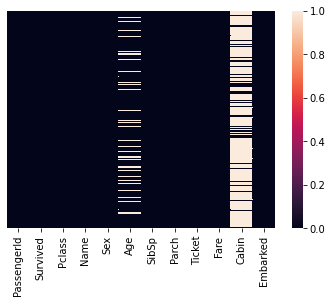

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,xticklabels=True)

## Observations
1.From the above map we can identify that there are more outliers in Cabin and Age

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
mean_value = df["Age"].mean()
mean_value

29.69911764705882

In [39]:
df["Age"].fillna("mean_value",inplace=True)

## I have filled the Null Values of Age,with mean of Age 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
## Iam dropping the unwanted columns from the data set
final_df = df.drop(["PassengerId","Ticket","Cabin"],axis=1)
final_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [53]:
final_df.groupby("Survived",sort=True).mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


In [67]:
df_Age = df[["Survived","Age"]]
df_Age

,Survived,Age
0,0,22.000000
1,1,38.000000
2,1,26.000000
3,1,35.000000
4,0,35.000000
...,...,...
886,0,27.000000
887,1,19.000000
888,0,29.699118
889,1,26.000000


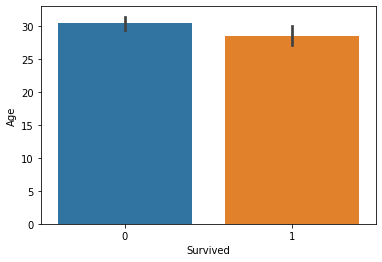

In [93]:
sns.barplot(x="Survived", y="Age",data=df_Age)


We can see in the above barplot is that there are less people survived of the age is more than 30 

In [109]:
df_sex=df[["Sex","Survived"]].value_counts()
df_sex

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

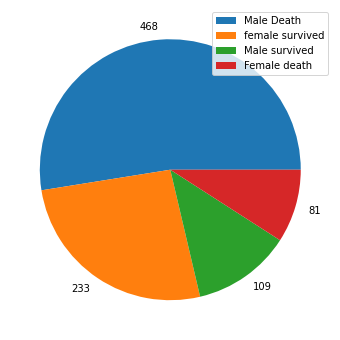

In [160]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = [6, 6]
mylabels = ["Male Death","female survived","Male survived","Female death"]
plt.pie(df_sex,labels=df_sex)
plt.legend(mylabels)

#Observations
1.The above pie chart shows us the survived numbers on basis of genders

2.Out of 890 people 468 Male has lost their lives 

3.Out of 890 people,233 Females has survived


In [114]:
final_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [129]:
df_class= final_df.groupby(["Survived","Pclass"]).size().reset_index()
df_class

,Survived,Pclass,0
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


##Observations
1.The above comparison shows us thos who are in 1st clas has survived more people as compared to other two class

2. 3 rd compartment people has died more as compared two other two compartments

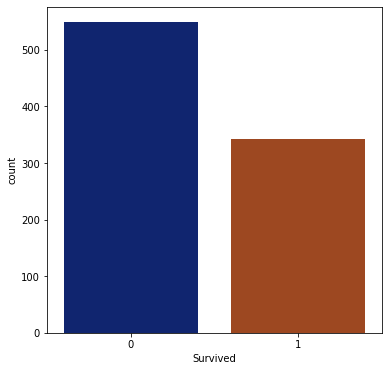

In [148]:
sns.countplot(data=df, x='Survived', palette='dark')

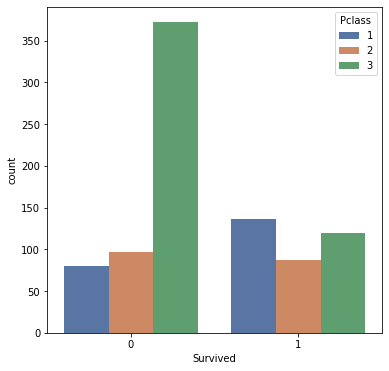

In [150]:
sns.countplot(data=df, x='Survived', hue='Pclass', palette='deep')

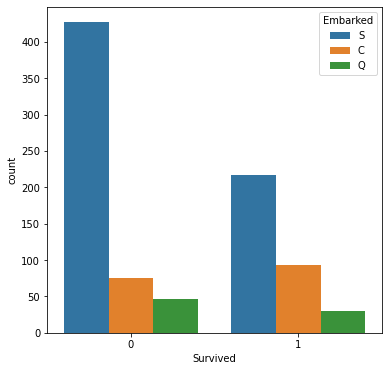

In [158]:
sns.countplot(data=df,x='Survived', hue= "Embarked")